In [88]:
import numpy as np
import pandas as pd
pd.reset_option('display.max_columns')
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import sys
import time
import os

In [89]:
from tqdm.notebook import tqdm

In [90]:
df = pd.read_csv("cell2celltrain.csv")
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


# Pre-Processing

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [92]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype == "object":
        cat.append(col)
    else:
        num.append(col)

In [93]:
print(cat)
print('\n')
print(num)

['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']


['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMa

In [94]:
# Rearrange the dataset for convnience
df = df[num + cat]
df.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes


## Null Value Treatment

In [95]:
v1 = df.isnull().sum()
v2 = ((df.isnull().sum()/len(df))*100).round(5)

[f'{percent:.2f}%' for percent in v2]

null_df = pd.DataFrame({'Null Value Count': v1,
                      'Null Value Percent':[f'{percent:.2f}%' for percent in v2]})
null_df

,Null Value Count,Null Value Percent
CustomerID,0,0.00%
MonthlyRevenue,156,0.31%
MonthlyMinutes,156,0.31%
TotalRecurringCharge,156,0.31%
DirectorAssistedCalls,156,0.31%
OverageMinutes,156,0.31%
RoamingCalls,156,0.31%
PercChangeMinutes,367,0.72%
PercChangeRevenues,367,0.72%
DroppedCalls,0,0.00%


In [96]:
## Filter out the variables with null values
null_df[null_df['Null Value Count']>0]

,Null Value Count,Null Value Percent
MonthlyRevenue,156,0.31%
MonthlyMinutes,156,0.31%
TotalRecurringCharge,156,0.31%
DirectorAssistedCalls,156,0.31%
OverageMinutes,156,0.31%
RoamingCalls,156,0.31%
PercChangeMinutes,367,0.72%
PercChangeRevenues,367,0.72%
Handsets,1,0.00%
HandsetModels,1,0.00%


In [97]:
## DataFrame after dropping the Null Values
null_df_dropped = df.dropna()

## Looking at Null Values in the Target Column
null_df_2 = pd.DataFrame(
    {'Actual Count':df['Churn'].value_counts(),
     '% Count':df['Churn'].value_counts(normalize=True).round(4),
     'Null Values': df.groupby('Churn')['Churn'].apply(lambda x:x.isnull().sum()),
     'Value Count After Dropping Null Rows': null_df_dropped['Churn'].value_counts(),
     '% Count After Dropping Null Rows': null_df_dropped['Churn'].value_counts(normalize=True).round(4)
    }
)

null_df_2

,Actual Count,% Count,Null Values,Value Count After Dropping Null Rows,% Count After Dropping Null Rows
No,36336,0.7118,0,35507,0.7137
Yes,14711,0.2882,0,14245,0.2863


In [98]:
# Looking at the above Null Value Investigation, we Drop all the null Values
df2 = df.copy()
df2 = df2.dropna()
df2.isnull().sum()

CustomerID                   0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
RetentionCalls               0
RetentionOffersAccepted      0
Referral

## Looking at Skew, Kurtosis and Normalization of the Numerical Variables.

In [99]:
# # Investigaing Data Skew
# a = pd.DataFrame(df2[num].skew()).sort_values(by=0, ascending=False)

# custom_palette = "hls" 
# plt.figure(figsize=(10, 10))
# sns.barplot(x=0, y=a.index, data=a, hue=a.index, palette = custom_palette)

In [100]:
# # Investigating Kurtosis
# df2[num].kurt()

# c_palette = 'hls'

# plt.figure(figsize=(10, 10))
# b = pd.DataFrame(df2[num].kurt()).sort_values(by=0, ascending=False)
# sns.barplot(x=0, y=b.index, data=b, hue=b.index)

In [101]:
# import statsmodels.api as sm
# num_df2 = df2[num]

# num_plots = len(num)

# num_rows = (num_plots+1)//2
# num_cols = 2

# # create subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 70))

# axes = axes.flatten()

# # Iterate over the columns and create qqplots
# for i, column in enumerate(num):
#     sm.qqplot(data=num_df2[column], ax=axes[i], line='q')

# # hide any empty subplots
# for j in range(len(num), len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

# Handling Categorical Data

In [102]:
# Looking at each categorical variable

for col in df2[cat].columns:
    print(col)
    print("the Number of Unique Values in this column is: " + str(df2[col].nunique()))
    print(df2[col].value_counts())
    print('\n')

Churn
the Number of Unique Values in this column is: 2
No     35507
Yes    14245
Name: Churn, dtype: int64


ServiceArea
the Number of Unique Values in this column is: 743
NYCBRO917    1646
DALDAL214    1479
HOUHOU281    1471
NYCMAN917    1156
DALFTW817     771
             ... 
SANROM956       1
INDCRA765       1
SEWSUN509       1
ATLDBL478       1
NCRDNN910       1
Name: ServiceArea, Length: 743, dtype: int64


ChildrenInHH
the Number of Unique Values in this column is: 2
No     37483
Yes    12269
Name: ChildrenInHH, dtype: int64


HandsetRefurbished
the Number of Unique Values in this column is: 2
No     42852
Yes     6900
Name: HandsetRefurbished, dtype: int64


HandsetWebCapable
the Number of Unique Values in this column is: 2
Yes    44905
No      4847
Name: HandsetWebCapable, dtype: int64


TruckOwner
the Number of Unique Values in this column is: 2
No     40280
Yes     9472
Name: TruckOwner, dtype: int64


RVOwner
the Number of Unique Values in this column is: 2
No     45619
Yes

In [103]:
# Ordinal Variables
cat_ordinal = ['CreditRating']

# Nominal Variables (Yes/No Variable)
cat_nominal = ['Churn','ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'BuysViaMailOrder','RespondsToMailOffers', 
               'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser','NotNewCellphoneUser', 
               'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'TruckOwner', 'RVOwner']

# Variables to use One Hot Encoding
cat_ohe = ['Homeownership','MaritalStatus', 'PrizmCode', 'Occupation'] 


# High Cardinality Categorical Variables
cat_hc = ['ServiceArea', 'HandsetPrice']

In [104]:
# Encoding Churn Variable
mapping = {"Yes":1, "No":0}

for col in cat_nominal:
    if col in df2.columns:
        df2[col] = df2[col].map(mapping)

In [105]:
# Encoding Credit Rating
mapping3 = {'2-High': 2,
            '1-Highest':1,
            '3-Good':3,
            '5-Low':5,
            '4-Medium':4,
            '7-Lowest':7,
            '6-VeryLow': 6}

df2['CreditRating'] = df2['CreditRating'].map(mapping3)

In [106]:
# Step 1: Filter the dataset by 'Churn'
filtered_df = df2[df2['Churn'] == 1]

# Step 2: Group by 'ServiceArea' and count the number of churns in each service area
service_area_counts = filtered_df.groupby('ServiceArea').size().reset_index(name='ChurnCount')

# Step 3: Rank the service areas based on the churn counts
service_area_ranks = service_area_counts.sort_values(by='ChurnCount', ascending=False)
service_area_ranks['Rank'] = range(1, len(service_area_ranks) + 1)

# Step 4: Bin the service areas into specified bins
bins = [0, 10, 20, 30, 40,float('inf')]
labels = ['Top 10', '11-20', '21-30', '31-40', '40+']
service_area_ranks['Bin'] = pd.cut(service_area_ranks['Rank'], bins=bins, labels=labels, right=False)


# Create a dictionary using the above dataframe for mapping
service_area_dict = dict(zip(service_area_ranks['ServiceArea'], service_area_ranks['Bin']))


# Encoding:
df2['ServiceArea'] = df2['ServiceArea'].map(service_area_dict).fillna(0)


# Check the value counts to see if the values got encoded properly
df2['ServiceArea'].value_counts()

40+       27382
Top 10     9079
11-20      5164
21-30      4262
31-40      3513
0           352
Name: ServiceArea, dtype: int64

In [107]:
# HandsetPrice

# encoding the Unknowns as 0
df2['HandsetPrice'] = df2['HandsetPrice'].apply(lambda x:0 if x=='Unknown' else x)

# Binning the rest of the rows
bins = [1, 50, 100, 200, 300, 400, 500]
labels = ['1-50', '50-100', '100-200', '200-300', '300-400', '400+']

# Create a new column 'HandsetPriceBin' based on binning
df2['HandsetPrice'] = pd.cut(pd.to_numeric(df2['HandsetPrice']), bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(df2['HandsetPrice'].value_counts())

1-50       9256
100-200    7285
50-100     3631
200-300    1253
400+         45
300-400      12
Name: HandsetPrice, dtype: int64


In [108]:
# One Hot Encoding
# df2 = pd.get_dummies(df2, columns=cat_ohe, drop_first=True, dtype=int)

In [109]:
# Performing One Hot Encoding (on the Encoded high Cardinality Variables + Nominal Variables)

# One Hot Encoding
df2 = pd.get_dummies(df2, 
                     columns=['HandsetPrice', 'ServiceArea', 'Homeownership',
                              'MaritalStatus', 'PrizmCode', 'Occupation'], 
                     drop_first=True, dtype=int)

In [110]:
df2.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,1,0,0,0,0,1,0,0,0
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,1,0,0,0,0,1,0,0,0
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,0,0,0,0,1,0,0,0,0
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,0,0,0,0,0,1,0,0,0


In [111]:
with pd.option_context('display.max_rows', None):
    print(pd.DataFrame(df2.columns))

                            0
0                  CustomerID
1              MonthlyRevenue
2              MonthlyMinutes
3        TotalRecurringCharge
4       DirectorAssistedCalls
5              OverageMinutes
6                RoamingCalls
7           PercChangeMinutes
8          PercChangeRevenues
9                DroppedCalls
10               BlockedCalls
11            UnansweredCalls
12          CustomerCareCalls
13              ThreewayCalls
14              ReceivedCalls
15              OutboundCalls
16               InboundCalls
17             PeakCallsInOut
18          OffPeakCallsInOut
19        DroppedBlockedCalls
20        CallForwardingCalls
21           CallWaitingCalls
22            MonthsInService
23                 UniqueSubs
24                 ActiveSubs
25                   Handsets
26              HandsetModels
27       CurrentEquipmentDays
28                     AgeHH1
29                     AgeHH2
30             RetentionCalls
31    RetentionOffersAccepted
32  Referr

In [112]:
# # Exporting the Dataset
# df2.to_excel('train1.xlsx', index=False)

# Checking for and Treating Multicollinearity

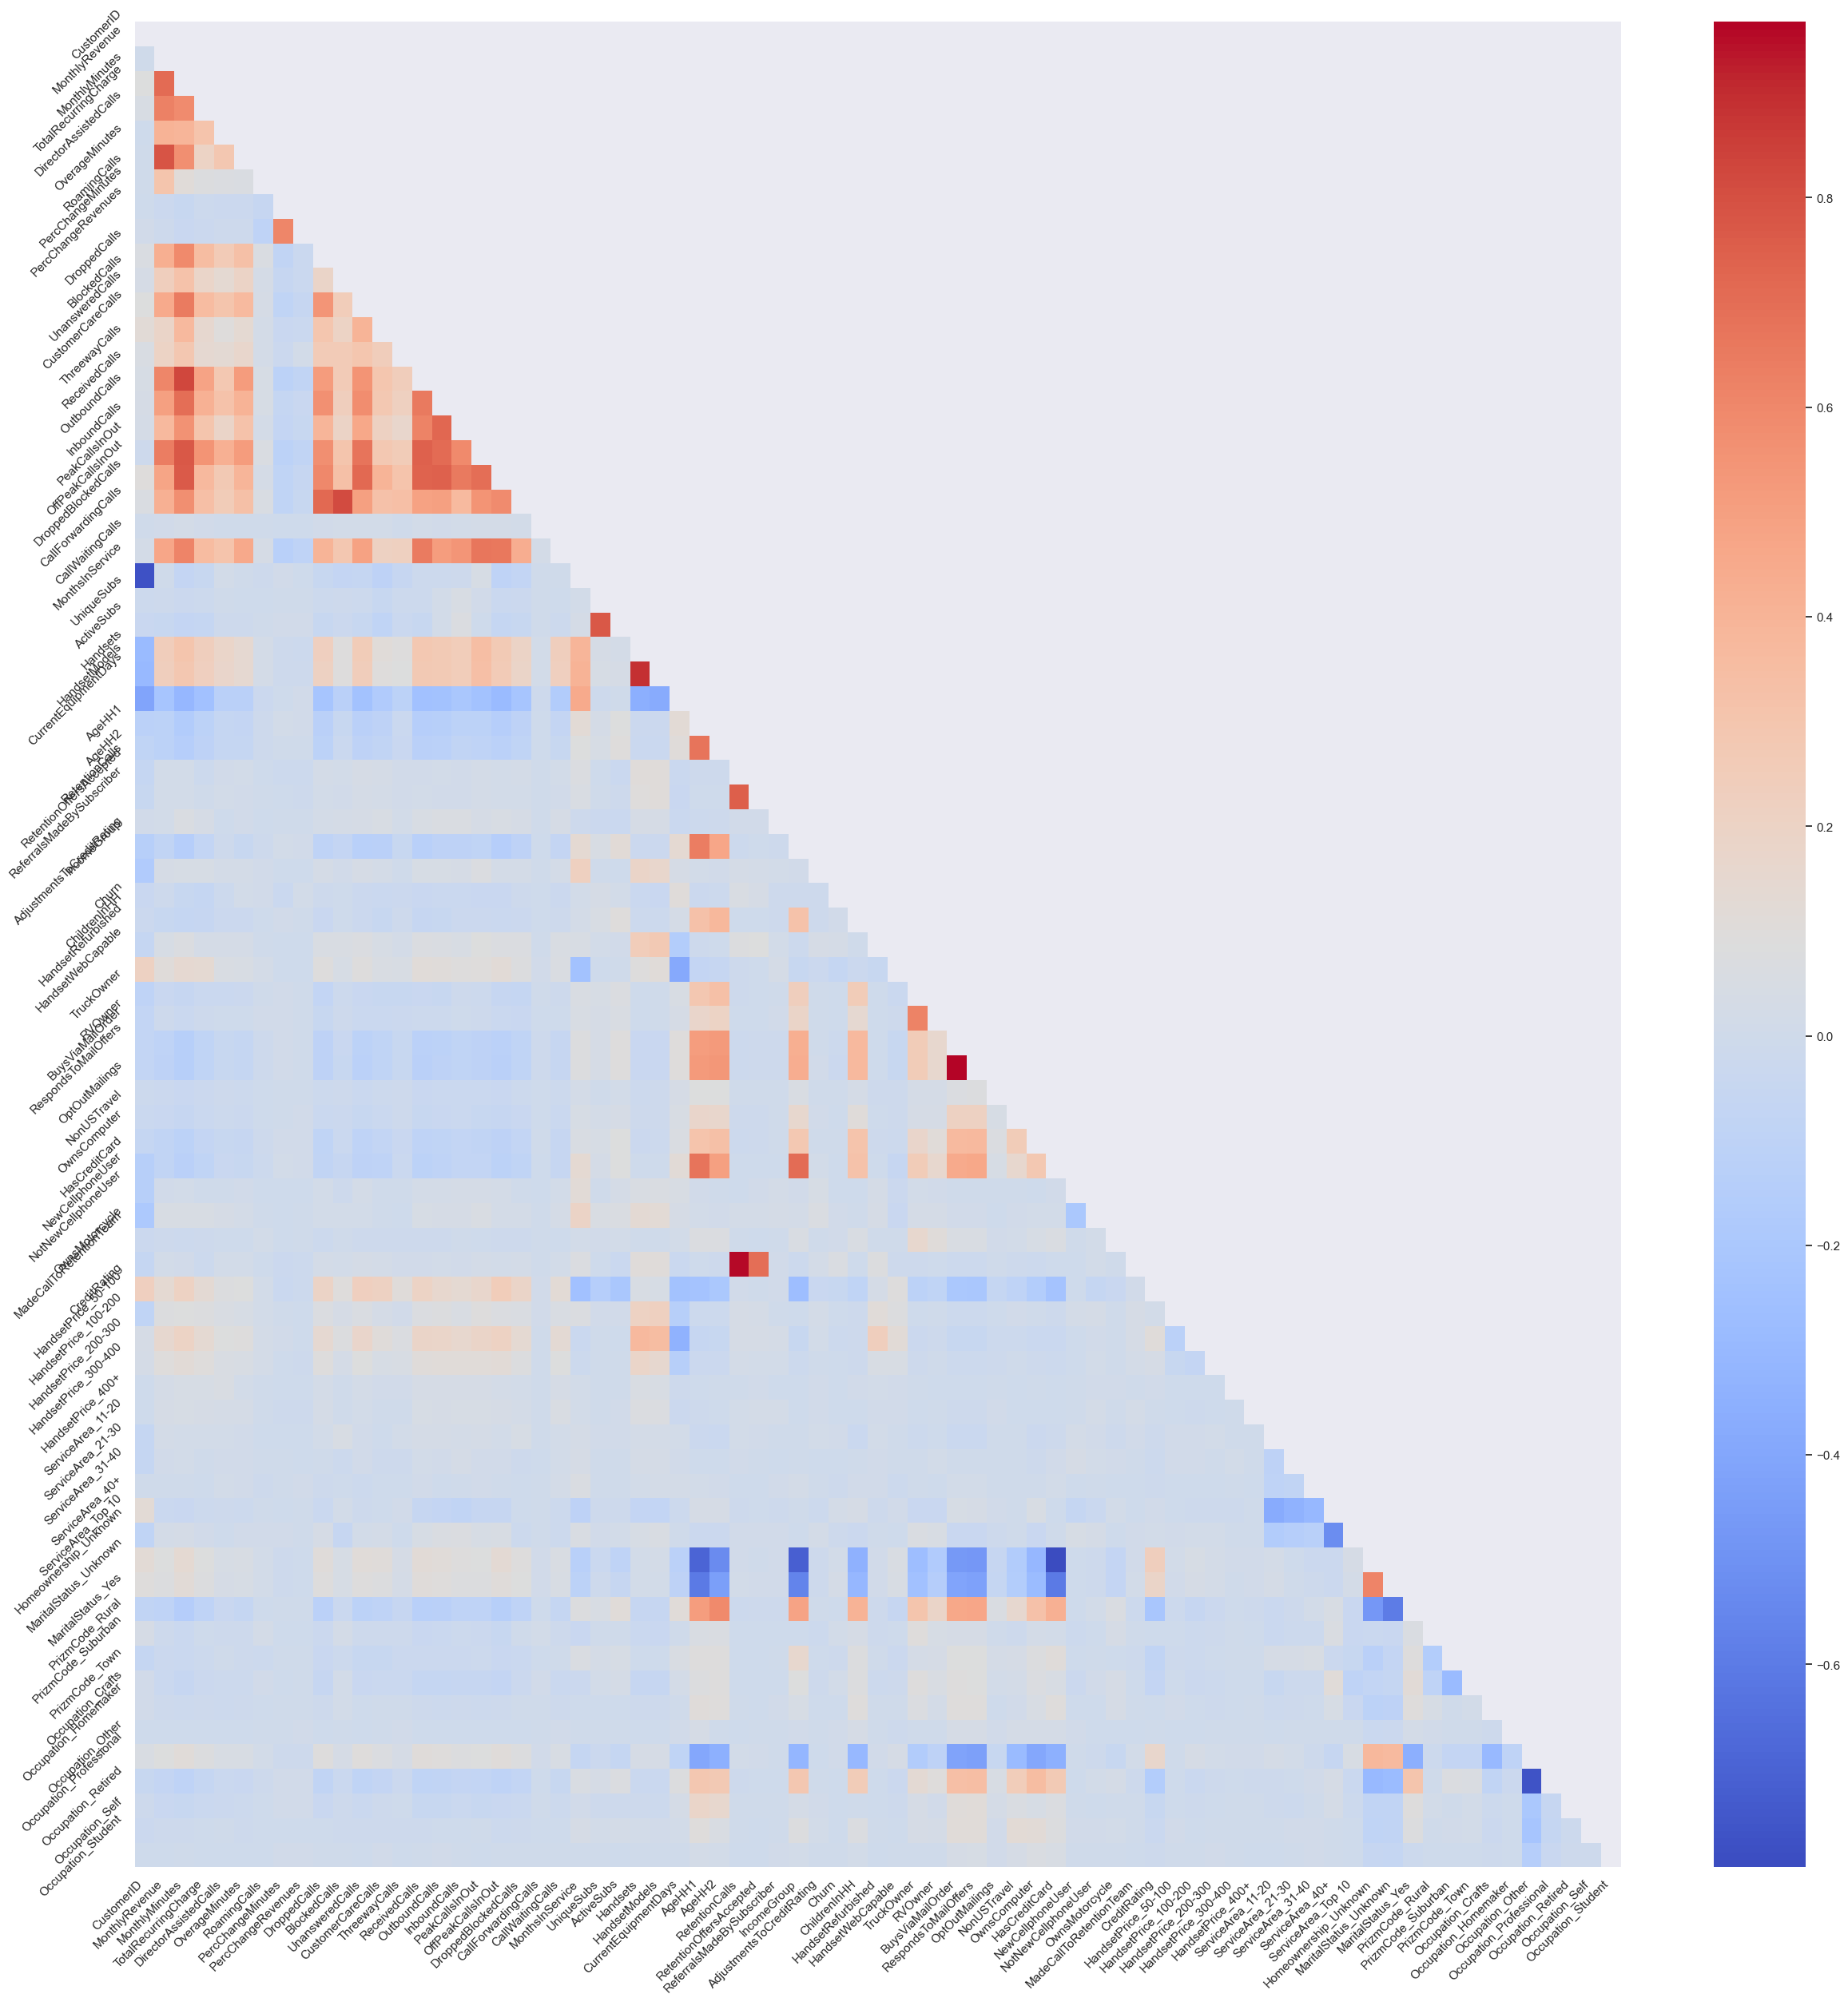

In [113]:
corr_matrix = df2.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(30,30))
heatmap = sns.heatmap(corr_matrix, mask=mask,cmap='coolwarm')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df2.drop(['Churn', 'CustomerID'], axis=1)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(vif_data.sort_values(by='VIF', ascending=False))

                      feature         VIF
18        DroppedBlockedCalls  367.383180
9                BlockedCalls  147.010405
8                DroppedCalls  130.077049
58            ServiceArea_40+   36.593170
68           Occupation_Other   31.800303
0              MonthlyRevenue   30.885854
40       RespondsToMailOffers   26.424943
39           BuysViaMailOrder   25.133208
25              HandsetModels   22.273218
2        TotalRecurringCharge   20.064923
24                   Handsets   14.731749
29             RetentionCalls   14.684470
23                 ActiveSubs   13.415354
21            MonthsInService   13.344765
59         ServiceArea_Top 10   13.109987
48    MadeCallToRetentionTeam   12.633653
1              MonthlyMinutes   12.350106
36          HandsetWebCapable   11.709056
44              HasCreditCard   10.299603
27                     AgeHH1    9.272914
26       CurrentEquipmentDays    8.474600
69    Occupation_Professional    8.334441
17          OffPeakCallsInOut    8

In [115]:
# Dropping the DroppedBlockedCalls and rechecking the VIF
X1 = df2.drop(['DroppedBlockedCalls', 'Churn', 'CustomerID'], axis=1)

vif_data = pd.DataFrame()
vif_data['feature'] = X1.columns

vif_data['VIF'] = [variance_inflation_factor(X1.values, i)
                  for i in range(len(X1.columns))]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(vif_data.sort_values(by='VIF', ascending=False))

                      feature        VIF
57            ServiceArea_40+  36.592609
67           Occupation_Other  31.798457
0              MonthlyRevenue  30.880577
39       RespondsToMailOffers  26.424867
38           BuysViaMailOrder  25.133157
24              HandsetModels  22.271673
2        TotalRecurringCharge  20.064328
23                   Handsets  14.731640
28             RetentionCalls  14.684458
22                 ActiveSubs  13.415353
20            MonthsInService  13.344765
58         ServiceArea_Top 10  13.109559
47    MadeCallToRetentionTeam  12.633652
1              MonthlyMinutes  12.349733
35          HandsetWebCapable  11.708983
43              HasCreditCard  10.299602
26                     AgeHH1   9.272911
25       CurrentEquipmentDays   8.474522
68    Occupation_Professional   8.334262
17          OffPeakCallsInOut   8.043459
16             PeakCallsInOut   7.910064
54          ServiceArea_11-20   7.879312
31                IncomeGroup   7.827078
4              O

In [116]:
# Dropping the ServiceArea_40+ Column and rechecking the VIF
X1 = df2.drop(['DroppedBlockedCalls', 'Churn', 'CustomerID', 'ServiceArea_40+'], axis=1)

vif_data = pd.DataFrame()
vif_data['feature'] = X1.columns

vif_data['VIF'] = [variance_inflation_factor(X1.values, i)
                  for i in range(len(X1.columns))]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(vif_data.sort_values(by='VIF', ascending=False))

                      feature        VIF
0              MonthlyRevenue  30.880520
39       RespondsToMailOffers  26.423420
38           BuysViaMailOrder  25.132832
66           Occupation_Other  22.855791
24              HandsetModels  22.136219
2        TotalRecurringCharge  19.938781
23                   Handsets  14.727523
28             RetentionCalls  14.683643
20            MonthsInService  13.312249
22                 ActiveSubs  13.166821
47    MadeCallToRetentionTeam  12.633631
1              MonthlyMinutes  12.346187
35          HandsetWebCapable  10.824913
43              HasCreditCard   9.908038
26                     AgeHH1   9.108120
25       CurrentEquipmentDays   8.077872
17          OffPeakCallsInOut   8.033439
16             PeakCallsInOut   7.903457
31                IncomeGroup   7.800666
4              OverageMinutes   7.783599
21                 UniqueSubs   6.436588
67    Occupation_Professional   6.383299
13              ReceivedCalls   6.291129
14              

In [117]:
df4 = df2.drop(['DroppedBlockedCalls', 'Churn', 'CustomerID', 'ServiceArea_40+'], axis=1)

with pd.option_context('display.max_rows', None):
    print(pd.DataFrame(df4.columns))

                            0
0              MonthlyRevenue
1              MonthlyMinutes
2        TotalRecurringCharge
3       DirectorAssistedCalls
4              OverageMinutes
5                RoamingCalls
6           PercChangeMinutes
7          PercChangeRevenues
8                DroppedCalls
9                BlockedCalls
10            UnansweredCalls
11          CustomerCareCalls
12              ThreewayCalls
13              ReceivedCalls
14              OutboundCalls
15               InboundCalls
16             PeakCallsInOut
17          OffPeakCallsInOut
18        CallForwardingCalls
19           CallWaitingCalls
20            MonthsInService
21                 UniqueSubs
22                 ActiveSubs
23                   Handsets
24              HandsetModels
25       CurrentEquipmentDays
26                     AgeHH1
27                     AgeHH2
28             RetentionCalls
29    RetentionOffersAccepted
30  ReferralsMadeBySubscriber
31                IncomeGroup
32  Adjust

In [123]:
# Exporting this dataframe
df4.to_excel('train2.xlsx', index=False)

# Scaling the above dataaset and export as a separate dataset

In [124]:
df5 = df4.copy()

In [125]:
from sklearn.preprocessing import StandardScaler

# initialize the scaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df5)

# Create a new DataFrame with scaled data
df5 = pd.DataFrame(scaled_data, columns=df5.columns)

# check the head
df5.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student
0,-0.783391,-0.579032,-1.045275,-0.288506,-0.413714,-0.124522,-0.568070,-0.452482,-0.587674,-0.311711,...,-0.224589,1.449140,-0.421117,-0.176738,-0.056264,-1.655607,2.175118,-0.12169,-0.133565,-0.087381
1,-0.941570,-0.974488,-1.255720,-0.400881,-0.413714,-0.124522,0.029924,0.029852,-0.631939,-0.376308,...,-0.224589,1.449140,-0.421117,-0.176738,-0.056264,-1.655607,2.175118,-0.12169,-0.133565,-0.087381
2,-0.467484,-0.978272,-0.371853,-0.400881,-0.413714,-0.124522,0.037741,0.029852,-0.665137,-0.376308,...,-0.224589,-0.690065,2.374639,5.658086,-0.056264,-1.655607,-0.459745,-0.12169,-0.133565,-0.087381
3,0.531686,1.489066,1.185434,0.156497,-0.413714,-0.124522,0.659185,0.235479,5.089263,0.334262,...,-0.224589,-0.690065,-0.421117,-0.176738,-0.056264,0.604008,-0.459745,-0.12169,-0.133565,-0.087381
4,-0.938185,-0.993409,-1.255720,-0.400881,-0.413714,-0.124522,0.045558,0.024775,-0.665137,-0.376308,...,-0.224589,-0.690065,-0.421117,-0.176738,-0.056264,-1.655607,2.175118,-0.12169,-0.133565,-0.087381


In [126]:
# Expor the Scaled Dataset
df5.to_excel("train3.xlsx", index=False)